In [1]:
import pandas as pd
import numpy as np
from time import time
t0 = time()
from src import ECDC, PHAC
t1 = time()
print(f"Time to import: {t1-t0:.2f}")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

Time to import: 14.08


In [16]:
t0 = time()
can = PHAC()
t1 = time()
print(f"Time to initialize PHAC dataset: {t1-t0:.2f}")
can.df[-13:]

Time to initialize PHAC dataset: 0.42


,date,location,total_cases,total_deaths,total_tests,population,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,new_cases,new_cases_per_million,new_deaths,new_deaths_per_million,new_tests,new_tests_per_thousand
793,2020-04-29,Alberta,4850,80.0,131772.0,4413146.0,1098.989247,18.127658,29.858971,0.0,0.000000,0.0,0.000000,0.0,0.000000
794,2020-04-29,Saskatchewan,366,5.0,27328.0,1181666.0,309.732192,4.231314,23.126670,0.0,0.000000,0.0,0.000000,413.0,0.349507
795,2020-04-29,Manitoba,272,6.0,23379.0,1377517.0,197.456728,4.355663,16.971841,0.0,0.000000,0.0,0.000000,0.0,0.000000
796,2020-04-29,Ontario,15728,996.0,244766.0,14711827.0,1069.071843,67.700633,16.637363,347.0,23.586466,45.0,3.058764,0.0,0.000000
797,2020-04-29,Quebec,25757,1682.0,204472.0,8537674.0,3016.863844,197.009162,23.949380,0.0,0.000000,0.0,0.000000,0.0,0.000000
798,2020-04-29,Newfoundland and Labrador,258,3.0,8191.0,521365.0,494.854852,5.754126,15.710683,0.0,0.000000,0.0,0.000000,286.0,0.548560
799,2020-04-29,New Brunswick,118,0.0,12907.0,779993.0,151.283409,0.000000,16.547584,0.0,0.000000,0.0,0.000000,0.0,0.000000
800,2020-04-29,Nova Scotia,915,27.0,28731.0,977457.0,936.102560,27.622698,29.393620,0.0,0.000000,0.0,0.000000,623.0,0.637368
801,2020-04-29,Prince Edward Island,27,0.0,2726.0,158158.0,170.715361,0.000000,17.235929,0.0,0.000000,0.0,0.000000,0.0,0.000000
802,2020-04-29,Yukon,11,0.0,953.0,41078.0,267.783242,0.000000,23.199766,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [19]:
can.df.loc[can.df.location == 'Ontario'][-7:]

,date,location,total_cases,total_deaths,total_tests,population,total_cases_per_million,total_deaths_per_million,total_tests_per_thousand,new_cases,new_cases_per_million,new_deaths,new_deaths_per_million,new_tests,new_tests_per_thousand
706,2020-04-23,Ontario,12879,713.0,188377.0,14711827.0,875.418124,48.464409,12.804460,634.0,43.094580,54.0,3.670516,9910.0,0.673608
721,2020-04-24,Ontario,13519,763.0,200270.0,14711827.0,918.920539,51.863035,13.612857,640.0,43.502415,50.0,3.398626,11893.0,0.808397
736,2020-04-25,Ontario,13995,811.0,210502.0,14711827.0,951.275460,55.125716,14.308352,476.0,32.354921,48.0,3.262681,10232.0,0.695495
751,2020-04-26,Ontario,14432,835.0,222129.0,14711827.0,980.979453,56.757057,15.098669,437.0,29.703993,24.0,1.631341,11627.0,0.790317
766,2020-04-27,Ontario,14856,892.0,234268.0,14711827.0,1009.799803,60.631491,15.923787,424.0,28.820350,57.0,3.874434,12139.0,0.825118
781,2020-04-28,Ontario,15381,951.0,244766.0,14711827.0,1045.485377,64.641869,16.637363,525.0,35.685575,59.0,4.010379,10498.0,0.713576
796,2020-04-29,Ontario,15728,996.0,244766.0,14711827.0,1069.071843,67.700633,16.637363,347.0,23.586466,45.0,3.058764,0.0,0.000000


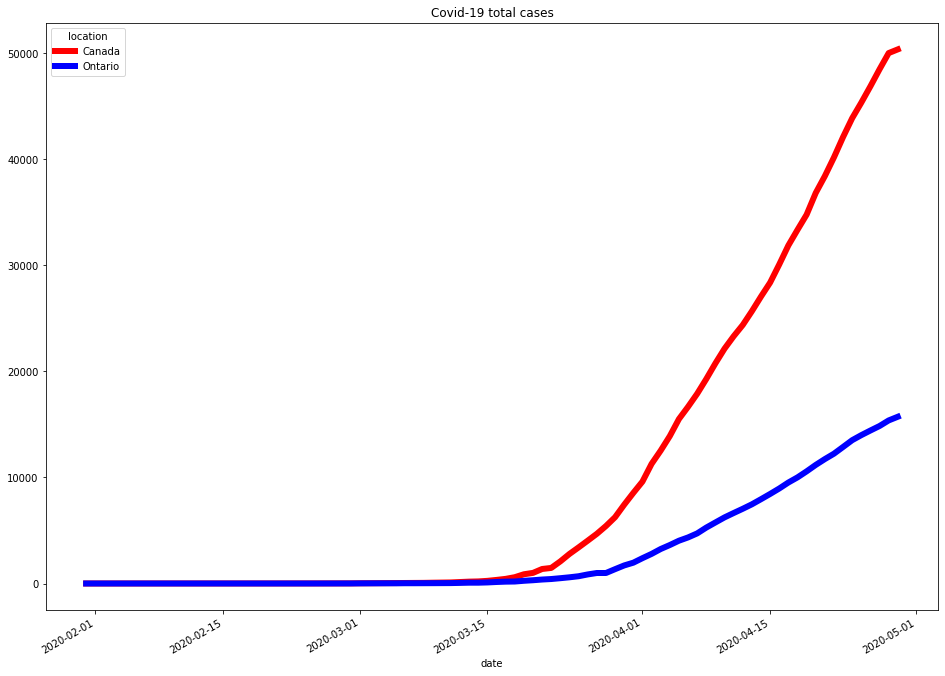

In [3]:
total_cases = can.pivot_location("total_cases", 'Canada', 'Ontario')
total_cases.plot(
    figsize=(16,12), 
    title=f"Covid-19 total cases",
    color=[can.prov_colours[loc] for loc in ['Canada', 'Ontario']],
    lw=6
)

In [4]:
window = 3

death_growth = can.growth_rate('total_deaths', window, *can.large_provinces)
death_growth

location,British Columbia,Canada,Ontario,Quebec
date,,,,
2020-01-31,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,NaN,NaN
2020-02-16,NaN,NaN,NaN,NaN
2020-02-21,NaN,NaN,NaN,NaN
2020-02-24,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-04-25,0.032280,0.062419,0.058933,0.067293
2020-04-26,0.019613,0.051236,0.046506,0.056584
2020-04-27,0.015926,0.047572,0.046053,0.051314


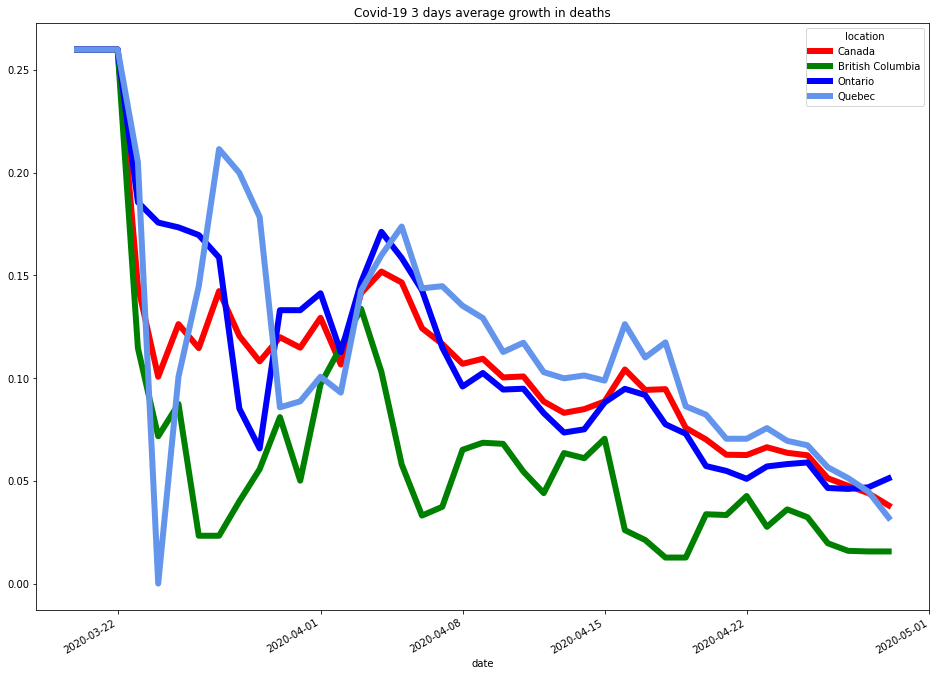

In [5]:
death_growth[can.large_provinces].plot(
    figsize=(16,12), 
    title=f"Covid-19 {window} days average growth in deaths",
    color=[can.prov_colours[loc] for loc in can.large_provinces],
    lw=6
)

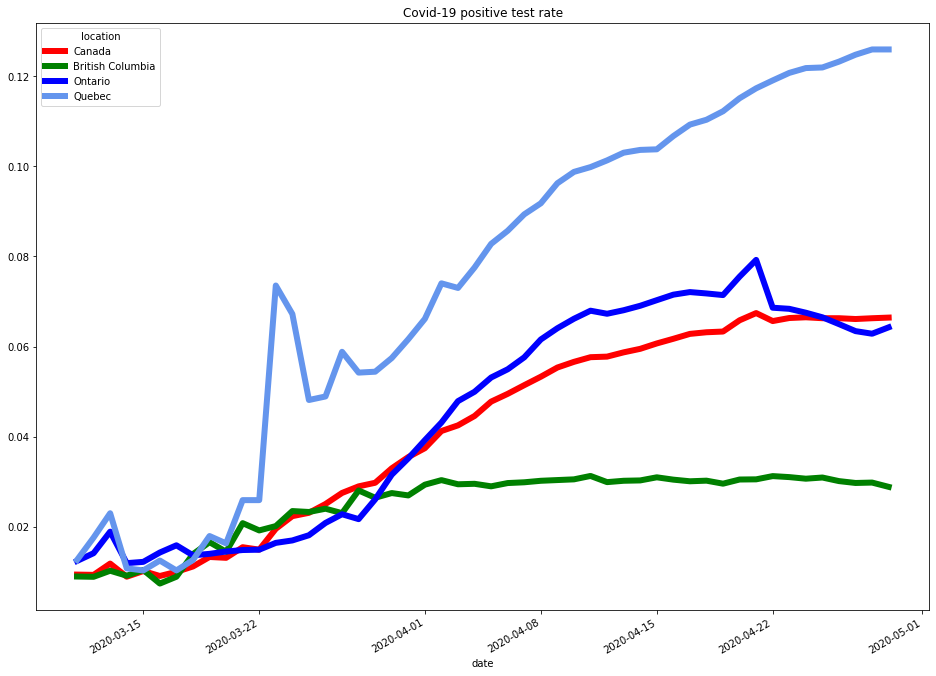

In [6]:
pt = can.cum_pos_test_rate(*can.provinces)
pt[can.large_provinces].plot(
    figsize=(16,12), 
    title=f"Covid-19 positive test rate",
    color=[can.prov_colours[loc] for loc in can.large_provinces],
    lw=6
)

/Users/bill/IdeaProjects/covid-19/src/dataset.py:137: RuntimeWarning: invalid value encountered in power
  growth = lambda x: np.power(x, 1 / window)


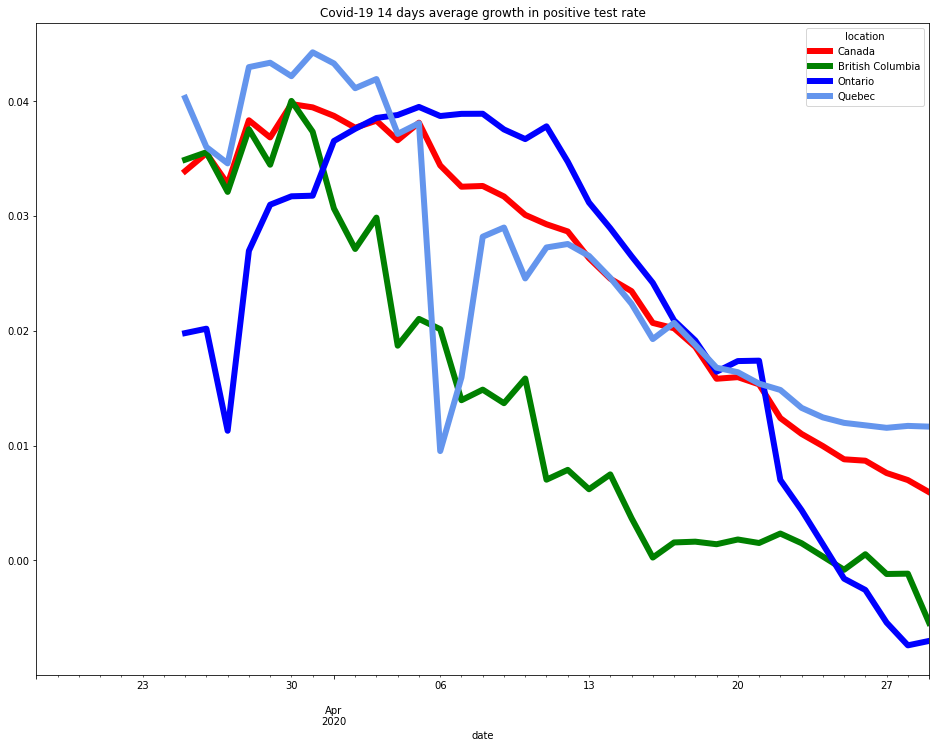

In [7]:
window = 14
pt_growth = can.cum_pos_test_growth_rate(window, *can.provinces)
pt_growth[can.large_provinces]['2020-03-18':].plot(
    figsize=(16,12), 
    title=f"Covid-19 {window} days average growth in positive test rate",
    color=[can.prov_colours[loc] for loc in can.large_provinces],
    lw=6
)

In [8]:
pt[can.large_provinces]['2020-03-01': '2020-04-13']

location,Canada,British Columbia,Ontario,Quebec
date,,,,
2020-03-01,inf,inf,inf,inf
2020-03-03,inf,inf,inf,inf
2020-03-05,inf,inf,inf,inf
2020-03-06,inf,inf,inf,inf
2020-03-07,inf,inf,inf,inf
2020-03-08,inf,inf,inf,inf
2020-03-09,inf,inf,inf,inf
2020-03-11,0.009344,0.008918,0.012375,0.012590
2020-03-12,0.009285,0.008855,0.014098,0.017568


In [9]:
pt_growth[can.large_provinces]['2020-03-01': '2020-04-06']

location,Canada,British Columbia,Ontario,Quebec
date,,,,
2020-03-01,NaN,NaN,NaN,NaN
2020-03-03,NaN,NaN,NaN,NaN
2020-03-05,NaN,NaN,NaN,NaN
2020-03-06,NaN,NaN,NaN,NaN
2020-03-07,NaN,NaN,NaN,NaN
2020-03-08,NaN,NaN,NaN,NaN
2020-03-09,NaN,NaN,NaN,NaN
2020-03-11,inf,inf,inf,NaN
2020-03-12,inf,inf,inf,NaN


In [10]:
nt = can.pivot_location('new_tests_per_thousand', *can.provinces)
nt[can.provinces][-8:-1].transpose()

date,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
location,,,,,,,
Canada,1.121134,0.602112,0.667450,0.640212,0.615678,0.694104,0.558924
Newfoundland and Labrador,0.521707,0.397035,0.466084,0.435396,0.207149,0.385526,0.506363
Prince Edward Island,0.088519,0.771381,0.619634,0.000000,0.784026,0.240266,0.000000
Nova Scotia,0.914618,0.745813,0.791851,0.677268,0.563708,0.579054,0.686475
New Brunswick,0.412824,0.634621,0.374362,0.475645,0.315387,0.157694,0.332054
Quebec,0.530355,0.560457,0.562097,0.601218,0.563620,0.538203,0.503650
Ontario,2.063714,0.673608,0.808397,0.695495,0.790317,0.825118,0.713576
Manitoba,0.234480,0.419596,0.356438,0.000000,0.000000,1.037374,0.166967
Saskatchewan,0.384203,0.419746,0.539069,0.470522,0.000000,0.799718,0.231030


In [11]:
nt[can.provinces].describe()

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.304463,0.238041,0.261150,0.445358,0.250721,0.362869,0.252081,0.257149,0.350404,0.452409,0.211105,0.351512,0.534811,0.151914
std,0.240679,0.255140,0.433155,0.377951,0.227907,0.359236,0.318963,0.281572,0.326827,0.392995,0.194880,1.354949,0.873294,0.266749
min,0.000000,-0.408543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.146064,0.000000,0.000000
25%,0.017010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.322902,0.234001,0.000000,0.514089,0.258336,0.431909,0.207622,0.204353,0.419746,0.445600,0.196736,0.000000,0.167023,0.025577
75%,0.459897,0.418133,0.456822,0.730978,0.425004,0.572346,0.333337,0.398725,0.572708,0.783341,0.328659,0.237353,0.707064,0.230197
max,1.121134,1.141235,2.579699,1.247114,0.947444,1.494201,2.063714,1.093271,1.605361,1.332836,0.855619,10.127075,4.342598,1.739264


In [12]:
tt = can.pivot_location('total_tests_per_thousand', *can.provinces)
tt[can.provinces][-8:-1].transpose()

date,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28
location,,,,,,,
Canada,16.220377,16.822488,17.489938,18.130151,18.745828,19.439933,19.998857
Newfoundland and Labrador,12.764570,13.161605,13.627689,14.063084,14.270233,14.655759,15.162123
Prince Edward Island,14.820622,15.592003,16.211636,16.211636,16.995663,17.235929,17.235929
Nova Scotia,24.712085,25.457897,26.249748,26.927016,27.490723,28.069777,28.756252
New Brunswick,14.257820,14.892441,15.266804,15.742449,16.057836,16.215530,16.547584
Quebec,20.620136,21.180593,21.742690,22.343908,22.907527,23.445730,23.949380
Ontario,12.130852,12.804460,13.612857,14.308352,15.098669,15.923787,16.637363
Manitoba,14.991467,15.411062,15.767501,15.767501,15.767501,16.804874,16.971841
Saskatchewan,20.317078,20.736824,21.275894,21.746416,21.746416,22.546134,22.777164


In [13]:
tt[can.provinces].describe()

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,6.560746,5.032216,5.326760,8.956730,5.433052,8.022093,4.571005,6.490125,8.354781,10.485906,5.678255,11.112636,15.875281,3.609515
std,6.499355,5.241263,6.131269,9.881908,5.807773,8.486046,4.900686,6.087494,8.149004,9.689003,4.545180,9.541097,14.117890,3.549100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.319629,0.088230,0.037937,0.125581,0.035257,0.070511,0.244140,0.255532,0.189774,0.567396,0.895828,0.000000,0.189293,0.006394
50%,4.743926,3.443845,2.668218,4.313745,3.007078,4.711061,3.041329,4.701575,6.503107,8.659355,6.170321,15.141925,14.308302,3.197176
75%,11.489970,9.351894,10.732938,16.617867,10.183425,15.269996,7.376310,12.417814,15.969826,17.319277,9.610311,20.150689,30.932656,6.752436
max,20.094559,15.710683,17.235929,29.393620,16.547584,23.949380,16.637363,16.971841,23.126670,29.858971,13.932920,23.199766,35.297524,10.026345


In [14]:
prev = can.pivot_location('total_cases_per_million', *can.provinces)
prev[can.provinces][-8:]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-04-22,1064.856998,491.018768,164.392569,789.804564,151.283409,2455.586850,832.323545,186.567570,275.881679,770.652047,351.208990,267.783242,111.348655,0.0
2020-04-23,1115.728494,491.018768,164.392569,846.073024,151.283409,2557.839524,875.418124,190.197290,280.112993,842.936082,356.883119,267.783242,111.348655,0.0
2020-04-24,1162.837619,491.018768,164.392569,869.603471,151.283409,2648.965046,918.920539,190.923234,288.575621,910.235011,362.557248,267.783242,111.348655,0.0
2020-04-25,1201.680127,492.936810,164.392569,884.949415,151.283409,2725.215322,951.275460,193.827009,295.345724,959.179687,381.144910,267.783242,111.348655,0.0
2020-04-26,1242.509801,494.854852,164.392569,893.133918,151.283409,2823.602775,980.979453,196.730784,298.730775,1015.148830,381.144910,267.783242,111.348655,0.0
2020-04-27,1285.035193,494.854852,164.392569,920.756616,151.283409,2926.089705,1009.799803,197.456728,308.885929,1064.093506,390.927890,267.783242,111.348655,0.0
2020-04-28,1325.467434,494.854852,170.715361,936.102560,151.283409,3016.863844,1045.485377,197.456728,309.732192,1098.989247,401.689168,267.783242,111.348655,0.0
2020-04-29,1334.661397,494.854852,170.715361,936.102560,151.283409,3016.863844,1069.071843,197.456728,309.732192,1098.989247,401.689168,267.783242,111.348655,0.0


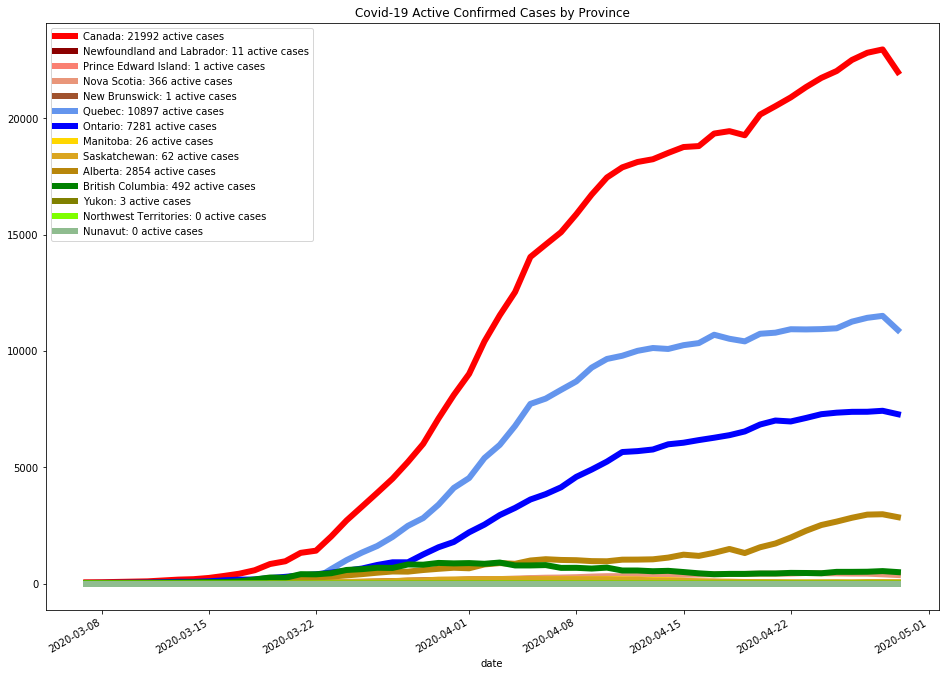

In [15]:
nc = can.pivot_location('new_cases', *can.provinces)
active_cases = nc.rolling(14).sum()
ax_ac = active_cases[can.provinces].plot(
    figsize=(16,12), 
    title=f"Covid-19 Active Confirmed Cases by Province",
    color=[can.prov_colours[loc] for loc in can.provinces],
    lw=6
)
legend_labels = [f"{prov}: {active_cases[-1:][prov].values[0]:.0f} active cases" for prov in can.provinces]
plt.legend(legend_labels, loc='upper left')